## In this Notebook we abalyze tye Precision, Recall and F1-score as functions of the threshold
### we derive the plot reported in FDA Submission document

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
stats = pd.read_csv('stat_df.csv')

In [3]:
stats.head(3)

,thr,tp,tn,fp,fn,Sens,Spec,Prec,F1-score
0,0.40,120,294,183,39,0.755,0.616,0.396,0.519
1,0.41,117,305,172,42,0.736,0.639,0.405,0.522
2,0.42,113,309,168,46,0.711,0.648,0.402,0.514


In [4]:
stats['acc'] = (stats['tp'] + stats['tn'])/636.

In [5]:
stats.head()

,thr,tp,tn,fp,fn,Sens,Spec,Prec,F1-score,acc
0,0.40,120,294,183,39,0.755,0.616,0.396,0.519,0.650943
1,0.41,117,305,172,42,0.736,0.639,0.405,0.522,0.663522
2,0.42,113,309,168,46,0.711,0.648,0.402,0.514,0.663522
3,0.43,112,317,160,47,0.704,0.665,0.412,0.520,0.674528
4,0.44,109,329,148,50,0.686,0.690,0.424,0.524,0.688679


In [6]:
tn = stats['tn'].values
fn = stats['fn'].values
tp = stats['tp'].values
fp = stats['fp'].values
thr = stats['thr'].values

In [7]:
# define vectorized function for Precision, Recall, F1-score
def compute_prec(tp, fp):
    return np.divide(tp, (tp + fp).astype(float))

def compute_rec(tp, fn):
    return np.divide(tp, (tp + fn).astype(float))

def compute_f1(tp, fn, fp):
    prec = np.divide(tp, (tp + fp).astype(float))
    rec = np.divide(tp, (tp + fn).astype(float))
    f1_score = np.divide(2*prec*rec, (prec + rec).astype(float))
    
    f1_score = np.round(f1_score, 3)
    return f1_score

In [8]:
# compute
rec = compute_rec(tp, fn)
prec = compute_prec(tp, fp)
f1_score = compute_f1(tp, fn, fp)

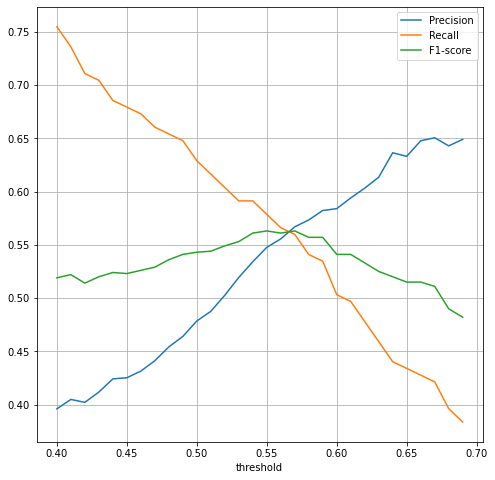

In [9]:
plt.figure(figsize=(8,8))
plt.plot(thr, prec, label='Precision')
plt.plot(thr, rec, label='Recall')
plt.plot(thr, f1_score, label='F1-score')
plt.xlabel('threshold')
plt.legend()
plt.grid()